# Overview Band Ratios

Notebook to fill in a tutorial / overview of oscillation band ratio measures. 

TODO: Fill out this notebook, working through ratio measures 'from scratch'. 

This can be used as an exercise to work with the canonical band ratio measures - and when it's done will be kept as a 'tutorial' on band ratio measures, to be kept with the project. 

In [12]:
%matplotlib inline 
import matplotlib.pyplot as plt #Used for plotting

from fooof import FOOOF

import numpy as np
from utils.ratios import *

from fooof.synth import gen_power_spectrum
from fooof.utils import trim_spectrum
from utils.plts import plot_fm_shading

This notebook will run through simulating one fooof'd generated power spectrum and running the suite of ratio calculations.

## Generate a power spectrum
#### single PSD, with actual normal theta beta

To create a synthetic power spectrum we will use fooof's built in function: gen_power_spectrum

In [2]:
gen_power_spectrum?

In [25]:
#Creates a single simulated spectrum with Theta, Alpha, Beta oscillations 
def gen_control_sample():
    sample = []
    
    sample.append(np.random.uniform(4, 7)) #Theta freq
    sample.append(np.random.uniform(.35,.75)) #Theta Amp
    sample.append(np.random.uniform(.25,1.05))#Theta SD
    
    sample.append(np.random.uniform(8, 12)) #slow alpha freq
    sample.append(np.random.uniform(.25,.55)) #Alpha Amp
    sample.append(np.random.uniform(.25,1.05))#Alpha SD
    
    sample.append(np.random.uniform(18, 25)) #Beta freq
    sample.append(np.random.uniform(.4,.75)) #Beta Amp
    sample.append(np.random.uniform(.25,1.05))#Beta SD
    
    
    return sample

In [26]:
frequencies, powers = gen_power_spectrum([1,50],[0,1], gen_control_sample(),nlv=.002)

The above code creates a list of frequencies and corresponding powers using frequencies from [1,50], with a slope of 1 and offset 0 (background params - [offset,slope]) with generated oscillations from gen_control_sample and with just an intsy bit of noise

We will now make a fooof object and add the newly created 'frequencies' and 'powers' into the fooof object. Then we will run the fooof model on the data we just added.

In [8]:
FOOOF?

In [34]:
model = FOOOF()
model.add_data(frequencies, powers)
model.fit()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



In [5]:
# Plotting the shaded PSDs

In [37]:
# Store central frequencies of simulated oscillations
theta_CF = model.peak_params_[0][0]
beta_CF = model.peak_params_[2][0]

In [ ]:
plot_fm_shading?

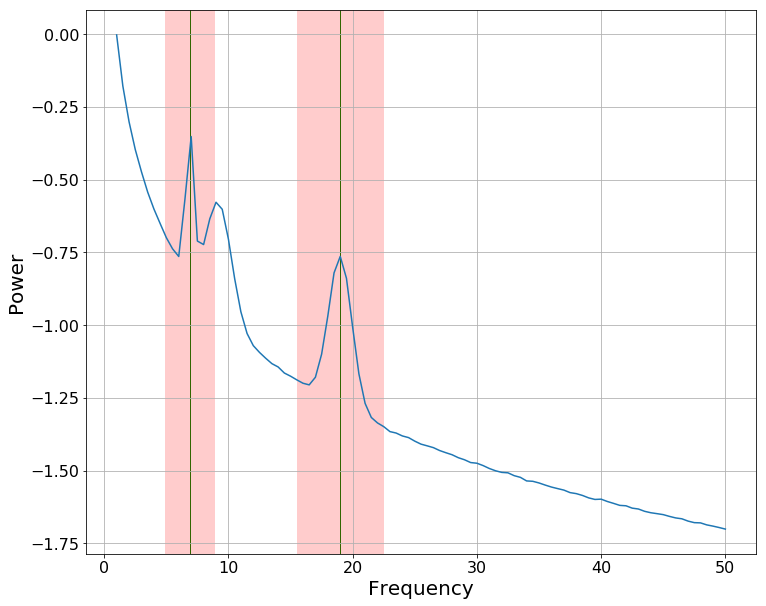

In [39]:
# Plot oscillations
plot_fm_shading(model,[theta_CF,beta_CF], [2,3.5])

Now we will calculate ratios in three ways